<a href="https://colab.research.google.com/github/SaraWestWA/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module3-dimensionality-reduction/SW_133_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Begin with item 7, it is the meat of th assignment.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import the PCA module from sklearn
from sklearn.decomposition import PCA

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

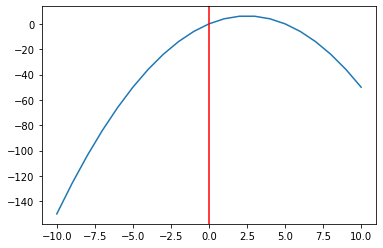

In [0]:
# this passes the vertical line test
x = np.arange(-10, 11)
y = 5*x-x**2
plt.plot(x, y)  
plt.axvline(x=0, color='r');

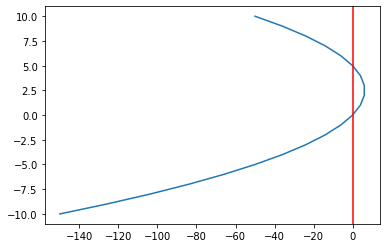

In [0]:
# this does not pass the vertical line test
y = np.arange(-10, 11)
x = 5*y-y**2
plt.plot(x, y)  
plt.axvline(x=0, color='r');

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

In linear algebra a function can only have one output per input. The veritical line test shows that this is so. If the graph does not pass the vertical line test, then there is more than one output for a given input.


# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}


Only Relation 2 is a function. For all of the other Relations, there are multiple y-values for single x-values.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

Domain m = 3
Codomain m=2

Domain n = 4
CoDomain n = 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
# make function p
def p(vect):
    x1=vect[0][0]
    x2=vect[1][0]
    row1 = np.array([x1 + 3*x2])
    row2 = np.array([2*x2 - x1])
    output_vector=np.array([row1, row2])
    return output_vector

In [28]:
# because all vectors can be made with transformation of unit vectors plug in the
# appropriate unit vectors, start with x
i_hat=np.array([[1],[0]])
a=p(i_hat)
a

array([[ 1],
       [-1]])

In [29]:
# now the y-axis
j_hat=np.array([[0],[1]])
b=p(j_hat)
b

array([[3],
       [2]])

In [30]:
# combine into a matrix
P=np.column_stack([a,b])
P

array([[ 1,  3],
       [-1,  2]])

In [31]:
# make a new input vector to try out
new_vec=np.array([[1],[2]])
a1=p(new_vec)
a1

array([[7],
       [3]])

In [32]:
# test p with  matmul function
a2=np.matmul(P,new_vec)
a2

array([[7],
       [3]])

## 4.2.1 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

\begin{align}
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [0]:
# make function p
def q(vect):
    x1=vect[0][0]
    x2=vect[1][0]
    x3=vect[2][0]
    row1 = np.array([4*x1 + x2 + 2*x3])
    row2 = np.array([-1*x1 + 2*x2 + 3*x3])
    row3 = np.array([5*x1 + x2 - 2*x3])
    output_vector=np.array([row1, row2, row3])
    return output_vector

In [44]:
# because all vectors can be made with transformation of unit vectors plug in the
# appropriate unit vectors, start with x
a_hat=np.array([[1],[0],[0]])
a_hat
q1=q(a_hat)
q1

array([[ 4],
       [-1],
       [ 5]])

In [45]:
# now the y-axis
b_hat=np.array([[0],[1],[0]])
b_hat
q2=q(b_hat)
q2

array([[1],
       [2],
       [1]])

In [46]:
# now the y-axis
c_hat=np.array([[0],[0],[1]])
c_hat
q3=q(c_hat)
q3

array([[ 2],
       [ 3],
       [-2]])

In [47]:
# combine into a matrix
Q=np.column_stack([q1,q2,q3])
Q

array([[ 4,  1,  2],
       [-1,  2,  3],
       [ 5,  1, -2]])

In [51]:
# make a new input vector to try out
anew_vec=np.array([[1],[2],[-1]])
x1=q(anew_vec)
x1

array([[4],
       [0],
       [9]])

In [52]:
# test p with  matmul function
x2=np.matmul(Q,anew_vec)
x2

array([[4],
       [0],
       [9]])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

The eigenvector of a matrix is a vector within the matrix that does not change direction when transformed/multiplied. The length will change, but not the orientation.

These are used along with the variance/covariance matrix

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

There may be too many features, more columns than can be analyzed easily or more columns than rows.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

There should be at least 10x as many observations as parameters

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also (https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of numerical recoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the numerical recoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [0]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [0]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL            object
AGE1                int64
METRO3             object
REGION             object
LMED                int64
                    ...  
FMTINCRELAMICAT    object
FMTASSISTED        object
FMTBURDEN          object
FMTREGION          object
FMTSTATUS          object
Length: 99, dtype: object

In [0]:
# check for null values
national.isnull().sum().any()

False

In [0]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [0]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL            category
AGE1                  int64
METRO3             category
REGION             category
LMED                  int64
                     ...   
FMTINCRELAMICAT    category
FMTASSISTED        category
FMTBURDEN          category
FMTREGION          category
FMTSTATUS          category
Length: 99, dtype: object

In [0]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head(5)

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0,0


In [0]:
# Now we only have numeric columns (ints and floats)
national_processed.dtypes

CONTROL            int32
AGE1               int64
METRO3              int8
REGION              int8
LMED               int64
                   ...  
FMTINCRELAMICAT     int8
FMTASSISTED         int8
FMTBURDEN           int8
FMTREGION           int8
FMTSTATUS           int8
Length: 99, dtype: object

In [0]:
# My code starts here
# collect column names for future use
national_cols=national_processed.columns[1:]
national_cols

Index(['AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'L30', 'L50', 'L80', 'IPOV',
       'BEDRMS', 'BUILT', 'STATUS', 'TYPE', 'VALUE', 'VACANCY', 'TENURE',
       'NUNITS', 'ROOMS', 'WEIGHT', 'PER', 'ZINC2', 'ZADEQ', 'ZSMHC',
       'STRUCTURETYPE', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COST06', 'COST12',
       'COST08', 'COSTMED', 'TOTSAL', 'ASSISTED', 'GLMED', 'GL30', 'GL50',
       'GL80', 'APLMED', 'ABL30', 'ABL50', 'ABL80', 'ABLMED', 'BURDEN',
       'INCRELAMIPCT', 'INCRELAMICAT', 'INCRELPOVPCT', 'INCRELPOVCAT',
       'INCRELFMRPCT', 'INCRELFMRCAT', 'COST06RELAMIPCT', 'COST06RELAMICAT',
       'COST06RELPOVPCT', 'COST06RELPOVCAT', 'COST06RELFMRPCT',
       'COST06RELFMRCAT', 'COST08RELAMIPCT', 'COST08RELAMICAT',
       'COST08RELPOVPCT', 'COST08RELPOVCAT', 'COST08RELFMRPCT',
       'COST08RELFMRCAT', 'COST12RELAMIPCT', 'COST12RELAMICAT',
       'COST12RELPOVPCT', 'COST12RELPOVCAT', 'COST12RELFMRPCT',
       'COST12RELFMRCAT', 'COSTMedRELAMIPCT', 'COSTMedRELAMICAT',
       'COSTMedRE

In [0]:
# start by Standardizing the data since PCA's output is influenced based on the scale of the features of the data.
from sklearn.preprocessing import StandardScaler
# 
# normalizing the features
x = national_processed.loc[:, national_cols].values
x = StandardScaler().fit_transform(x) 
x

array([[ 1.48807451,  0.60878419, -1.32787201, ...,  0.54947295,
        -0.46210707,  0.        ],
       [ 0.08881241,  2.18426992,  0.57669794, ..., -0.54470863,
        -0.46210707,  0.        ],
       [ 0.21999323,  2.18426992,  0.57669794, ...,  1.64365453,
        -0.46210707,  0.        ],
       ...,
       [-1.09181499, -0.17895868,  1.52898291, ...,  1.64365453,
         2.16400067,  0.        ],
       [ 0.39490099, -0.96670154,  1.52898291, ..., -0.54470863,
         2.16400067,  0.        ],
       [ 0.78844346,  1.39652706,  0.57669794, ..., -0.54470863,
        -0.46210707,  0.        ]])

In [0]:
# Check whether the data is normalized.
print('{:.2f}'.format(np.mean(x)))

# is the std 1?
print('{:.2f}'.format(np.std(x)))

0.00
0.99


In [0]:
# make it into a dataframe
national_df=pd.DataFrame(x, columns=national_cols)
national_df.head()

,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,ABL50,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,1.488075,0.608784,-1.327872,0.454953,-0.528766,-0.444470,-0.445262,-0.553127,-0.681429,-0.603700,1.504196,-0.271749,-0.142292,-0.409728,-0.26814,-0.518234,-0.253701,0.193641,0.989256,-0.345248,-0.582421,-0.001189,-0.538157,-0.626460,-0.858681,-0.108318,1.002403,-0.524572,-0.489431,-0.511002,-0.535753,-0.693001,-0.774303,0.454953,-0.444470,-0.445262,-0.553127,-0.100276,-0.139349,-0.140598,...,0.448213,-0.508180,-0.588115,-0.524716,-1.139197,-0.294200,0.432580,-0.487463,-0.685212,-0.580668,-0.896546,-0.272848,0.472927,-0.526199,-0.452728,-0.001189,-0.706647,1.728565,-0.627170,-0.612264,-0.858681,0.676610,0.649838,0.615731,0.703541,0.071352,-0.518776,-0.588115,-0.685212,-0.452728,-1.091609,-0.956874,-1.028145,-1.139197,-0.896546,-0.779119,-0.709278,0.549473,-0.462107,0.0
1,0.088812,2.184270,0.576698,-0.991324,-0.163391,-0.123184,-0.122457,-0.043566,1.140132,1.224839,0.515773,-0.271749,-0.142292,-0.048319,-0.26814,-0.518234,-0.253701,0.193641,0.213178,0.823743,0.827974,-0.001189,-0.584987,-0.626460,-0.858681,0.478101,-0.065553,-0.214100,-0.155728,-0.190289,-0.235410,1.204959,-0.774303,-0.991324,-0.123184,-0.122457,-0.043566,0.108920,-0.207233,-0.206327,...,0.448213,-0.135192,0.796007,-0.102732,0.682587,-0.316521,0.432580,-0.084420,0.716067,-0.203481,0.115986,-0.399199,0.167739,-0.199905,-0.452728,-0.001189,-0.706647,0.467274,-0.627170,1.390040,-0.858681,-0.080937,0.649838,0.615731,-0.052382,0.778350,0.859820,0.796007,0.716067,-0.452728,0.926091,0.024966,-0.077478,0.682587,0.115986,1.171883,-0.709278,-0.544709,-0.462107,0.0
2,0.219993,2.184270,0.576698,-0.991324,-0.163391,-0.892063,-0.892949,-0.901606,-0.071564,1.224839,0.705854,-0.271749,-0.142292,0.031993,-0.26814,-0.518234,-0.253701,0.718708,0.263808,0.044416,-0.448652,-0.001189,0.349585,-0.626460,-0.858681,-0.185141,-0.208710,-0.198696,-0.116072,-0.164791,-0.229295,-0.260945,-0.774303,-0.991324,-0.892063,-0.892949,-0.901606,-0.443533,-0.201751,-0.203806,...,0.448213,-0.099583,0.796007,-0.053669,0.682587,-0.035118,0.432580,-0.028753,0.716067,-0.196046,0.115986,-0.129488,0.472927,-0.191508,-0.452728,-0.001189,-0.706647,0.467274,-0.627170,1.390040,-0.858681,0.676610,0.649838,0.615731,0.703541,0.071352,0.859820,0.796007,0.716067,-0.452728,-0.082759,0.024966,0.397856,0.682587,0.115986,0.001282,-0.709278,1.643655,-0.462107,0.0
3,0.832170,2.184270,0.576698,-0.991324,-0.546527,-0.892063,-0.892949,-0.901606,-0.280162,0.310570,0.705854,-0.271749,-0.142292,0.232776,-0.26814,-0.518234,-0.253701,0.193641,0.384872,0.044416,-0.391586,-0.001189,-0.796742,-0.626460,-0.858681,-0.031494,0.019197,0.031870,0.106710,0.062991,0.003272,-0.693001,-0.774303,-0.991324,-0.892063,-0.892949,-0.901606,-0.443533,-0.634993,-0.636447,...,0.448213,0.425176,0.796007,0.351204,1.138032,0.296510,0.432580,0.486190,0.716067,0.220677,0.622252,0.212108,0.472927,0.336529,0.923669,-0.001189,-0.706647,0.467274,-0.627170,0.388888,-0.858681,0.676610,0.649838,0.615731,0.703541,0.778350,0.859820,0.796007,0.716067,0.923669,-0.082759,1.006807,1.348523,1.138032,0.622252,0.001282,-0.709278,-0.544709,-0.462107,0.0
4,-0.960634,-0.966702,0.576698,-0.575

In [0]:
# import sklearn PCA module
from sklearn.decomposition import PCA

# intialize the pca model 
mypca = PCA(n_components=2) 

In [0]:
# transform data to 2 dimensions using the information from fitting
national_data= mypca.transform(national_df)

In [0]:
# fit data to pca m
mypca.fit(national_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
# look at the new array in 2D
print(national_data.shape)
national_data

(64535, 2)


array([[-2.60748434, -1.38033158],
       [ 2.01031327, -0.99201857],
       [ 1.18484923,  0.36621931],
       ...,
       [ 1.86214169, -2.95179562],
       [-4.99538419, -2.52488092],
       [-9.86785674, -0.79890107]])

In [0]:
# make another dataframe with only two discritor columns
lil_df= pd.DataFrame(data=national_data, columns=['component_1', 'component_2'])
lil_df.head()

,component_1,component_2
0,-2.607484,-1.380332
1,2.010313,-0.992019
2,1.184849,0.366219
3,2.791772,1.719967
4,-1.600407,-0.882243


In [1]:
# check out the explained variance ratio
mypca.explained_variance_ratio_

NameError: ignored

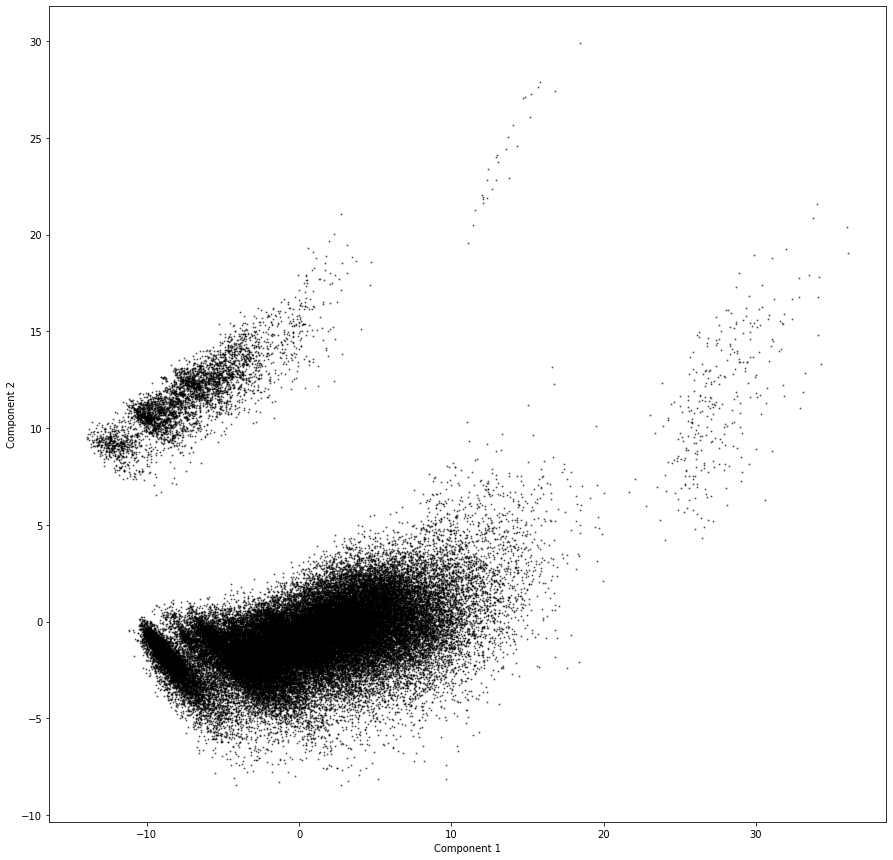

In [0]:
# plot the components against one another
plt.figure(figsize=(15,15))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(lil_df['component_1'],lil_df['component_2'], s=1, color='black',alpha=.5);

# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)